In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

100


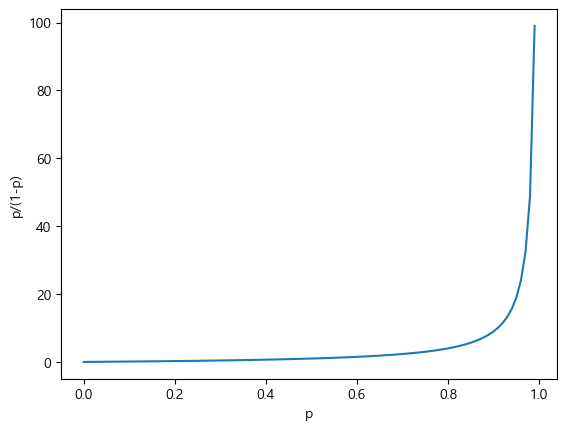

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


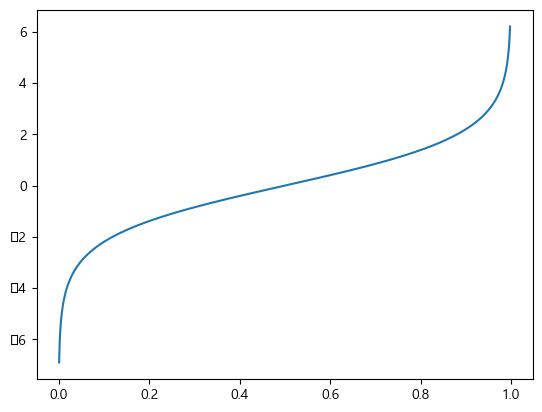

In [3]:
#오즈비
# odds ratio
# 성공확률과 실패 확률의 비율을 나타내는 값
# p / (1-p) p=성공확률
# p가 0에서 1까지 증가할 때 오즈비는 처음에 천천히 증가하지만
#p가 1에 가까워지면 급격히 증가함
probs = np.arange(0, 1, 0.01) # 0~1, 0.01 간격의 리스트
print(len(probs))
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()
##############################
#logit 함수
#오즈 비에 로그 함수를 취하여 만든 함수
# log( p / (1-p) ) = z
# p가 0.5일 때 0이 되고 p가 0과 1일 때 각각 무한대로 음수와 양수가 되는 특징
probs = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)

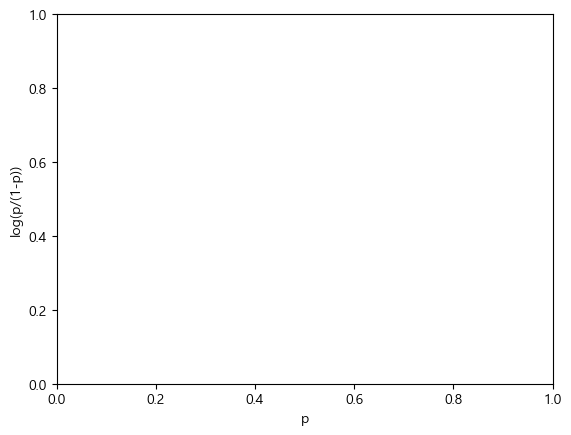

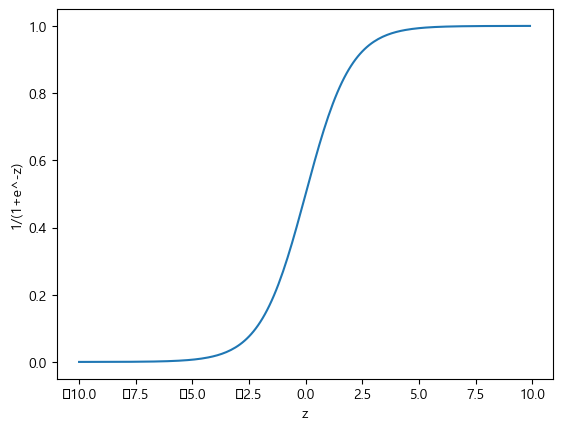

In [4]:
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()
##############################
# log( p / (1-p) ) = z
# 위의 식을 z에 대해 정리한 식(로지스틱 함수, sigmoid 함수라고도 함)
# logit 함수의 x,y축이 바뀐 모양
# p = 1/(1+e^-z)
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

# forge 데이터셋

In [5]:
#pip install mglearn
%matplotlib inline
from matplotlib import pyplot as plt
import mglearn
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#############################################

X.shape: (26, 2)


c:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


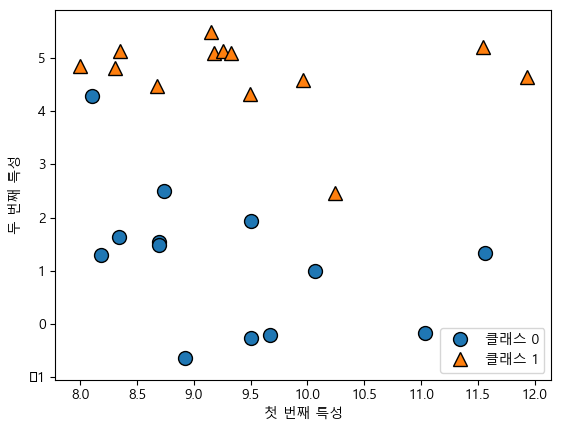

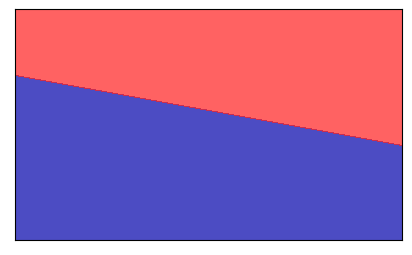

In [11]:
#plt.rcParams['figure.dpi'] = 300
# forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()
# 산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
#데이터포인트 26개와 특성 2개
print("X.shape: {}".format(X.shape))
#############################################
#분류용 선형 모델(로지스틱 회귀)
#로지스틱 회귀분석은 회귀분석이 아니라 분류 알고리즘에 해당됨
from sklearn.linear_model import LogisticRegression
fig, axes = plt.subplots(1,1, figsize=(5, 3))
model=LogisticRegression()
#모델을 학습시킴
model = model.fit(X, y)
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5,
ax=axes, alpha=.7)

0.9230769230769231

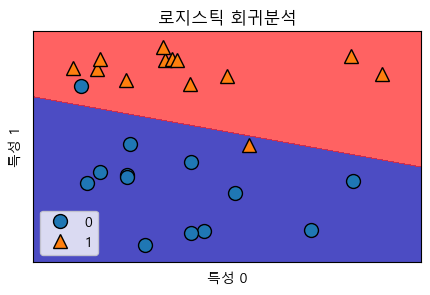

In [12]:
#분류용 선형 모델(로지스틱 회귀)
#로지스틱 회귀분석은 회귀분석이 아니라 분류 알고리즘에 해당됨
from sklearn.linear_model import LogisticRegression
fig, axes = plt.subplots(1,1, figsize=(5, 3))
model=LogisticRegression()
#모델을 학습시킴
model = model.fit(X, y)
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5,
ax=axes, alpha=.7)
#산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)
axes.set_title("로지스틱 회귀분석")
axes.set_xlabel("특성 0")
axes.set_ylabel("특성 1")
axes.legend()
#결정경계가 직선으로 표현되었고
#위쪽 클래스1
#아래쪽 클래스 0
#새로운 데이터가 직선 위에 놓이면 클래스1
#반대로 직선 아래쪽에 놓이면 클래스 0
#포인트 2개가 잘못 분류됨
#############################################
model.score(X,y) # 분류 정확도를 이야기해줌

In [10]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X)
cm=confusion_matrix(y,pred)
cm

array([[12,  1],
       [ 1, 12]], dtype=int64)

In [14]:
import numpy as np
# 1원을 1년 저축 100% 이자 => 원금 1원 , 이자 1원 => 2원
# 복리라면 1원을 6개월씩 나누어 저축, 1+0.5, 1원에 대한 이자0.5, 0.5에 대한 이자 0.25
# => 2.25
# 365일 투자하고 계속 나누어서 투자한다면 1년에 최대2.71828... 을 얻을 수 있다
print(np.e) #오일러 상수
print(np.exp(1)) #y=e의 1승
print(np.exp(2)) #y=e의 2승
#############################################

2.718281828459045
2.718281828459045
7.38905609893065


(-0.1, 1.1)

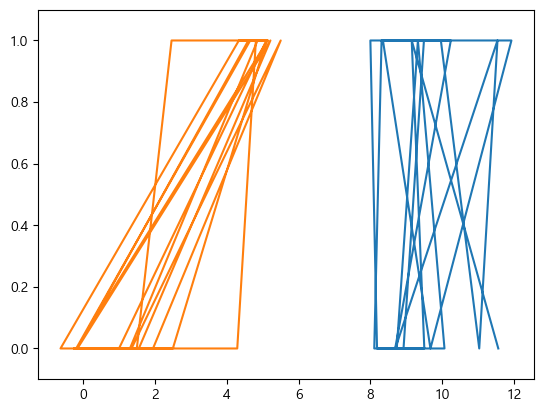

In [16]:
#로지스틱 함수는 시그모이드 함수의 일종 : S자 모양의 함수
# 0.0~1.0 사이의 실수값
%matplotlib inline
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    X = np.arange(-5.0, 5.0, 0.1)
    y = sigmoid(X)
plt.plot(X, y)
plt.ylim(-0.1, 1.1)

In [17]:
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2

In [19]:
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# random_state : 난수 발생 시드
from sklearn.datasets import make_classification
import statsmodels.api as sm
X, y = make_classification(n_features=1, n_redundant=0,
n_informative=1, n_clusters_per_class=1, random_state=4)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.162261
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.7658
Time:                        12:10:34   Log-Likelihood:                -16.226
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1866      0.884      4.738      0.000       2.455       5.919


In [21]:
#예측값은 0.0~1.0 사이의 실수값
result=logit_res.predict(X)[:5]
print(result)
# 0.5 이상이면 1, 미만이면 0으로 분류함
for a in result:
    print(int(round(a)),end=' ')

[0.08580852 0.99949403 0.00370571 0.99933961 0.30472943]
0 1 0 1 0 

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


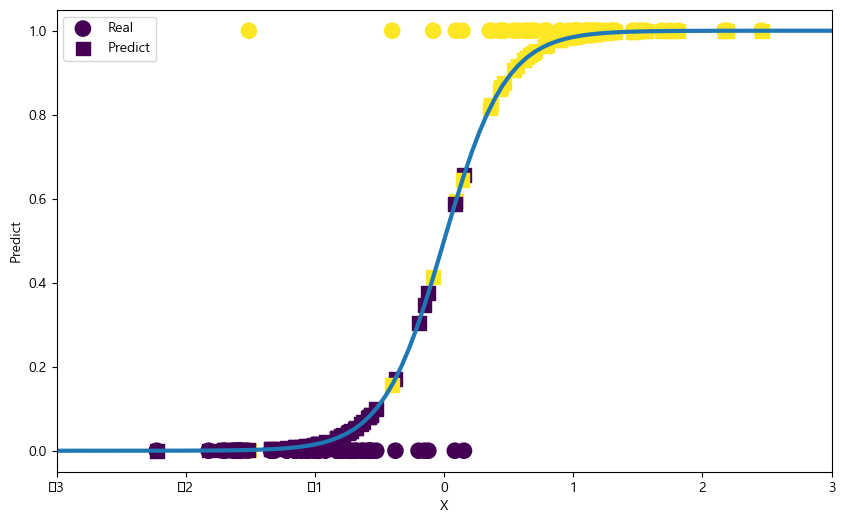

In [22]:
xx = np.linspace(-3, 3, 100)
pred = logit_res.predict(xx) #모형이 예측한 값
plt.figure(figsize=(10,6))
plt.plot(xx, pred, lw=3) #lw: line width
plt.scatter(X, y, c=y, s=100, lw=2, label='Real')
plt.scatter(X, logit_res.predict(X), label='Predict',
marker='s', c=y, s=100, lw=1)
plt.xlim(-3, 3)
plt.xlabel('X')
plt.ylabel('Predict')
plt.legend()

In [23]:
#로지스틱 회귀 모형의 성능 측정
#log_loss() 로그 손실값(분류 모형의 성능을 평가할 때 사용하는값)
# 100%의 확률로 답을 구한 경우 -log(1.0)=0
# 80% 확률 -log(0.8)=0.22314
# 60% 확률 -log(0.6)=0.51082
# 확률이 낮아질수록 log loss는 크게 증가한다.(확률이 낮을 때더 많은 패널티를 부여)
from sklearn.metrics import log_loss
y_hat = logit_res.predict(X)
# normalize 정규화 여부
log_loss(y, y_hat, normalize=False)
#실제 y값의 평균
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [24]:
#y 리스트와 같은 사이즈로 값을 1로 초기화한 리스트
np.ones_like(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
#실제 y값의 평균으로 계산한 로그 손실값
y_null = np.ones_like(y) * mu_null
print(y_null)
log_loss(y, y_null, normalize=False)

[0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51]


69.29471672244784

In [26]:
#결정계수값(Pseudo R-squ.)
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7658389667520492

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, stratify=y, random_state=0)
#사이킷런 패키지의 LogisticRegression() 함수
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
print(model.classes_) #출력값
print(model.intercept_) #절편
print(model.coef_) #회귀계수

[0 1]
[0.01210487]
[[2.99972644]]


In [30]:
# 0일 확률, 1일 확률
model.predict_proba(X_test)

array([[0.00935192, 0.99064808],
       [0.00428094, 0.99571906],
       [0.98204208, 0.01795792],
       [0.11773589, 0.88226411],
       [0.10564409, 0.89435591],
       [0.94862134, 0.05137866],
       [0.9892088 , 0.0107912 ],
       [0.13379119, 0.86620881],
       [0.00138017, 0.99861983],
       [0.84331206, 0.15668794],
       [0.8996786 , 0.1003214 ],
       [0.94798802, 0.05201198],
       [0.91098884, 0.08901116],
       [0.25466241, 0.74533759],
       [0.04540992, 0.95459008],
       [0.96422105, 0.03577895],
       [0.99385324, 0.00614676],
       [0.88332811, 0.11667189],
       [0.85162766, 0.14837234],
       [0.03287681, 0.96712319]])

In [31]:
model.predict(X_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [32]:
model.score(X_test, y_test)

0.95

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[10,  0],
       [ 1,  9]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))
# precision(정확도, 정밀도) : 모델이 True라고 분류한 것 중에서실제 True의 비율
# recall(재현율, 검출율) : 실제값이 True인 것 중에서 모델이True라고 예측한 것의 비율
# f1-score : precision과 recall의 조화평균(불균형 데이터셋에많이 사용하는 평가 지표)
# support : 실제값의 개수(0이 1개, 1이 3개)
# accuracy : 정확도
# macro avg : 단순평균(모든 클래스를 동일한 비중으로 고려)
# weighted avg : 각 클래스에 속하는 표본의 개수로 가중평균(f1-score와 같은 값)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



c:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


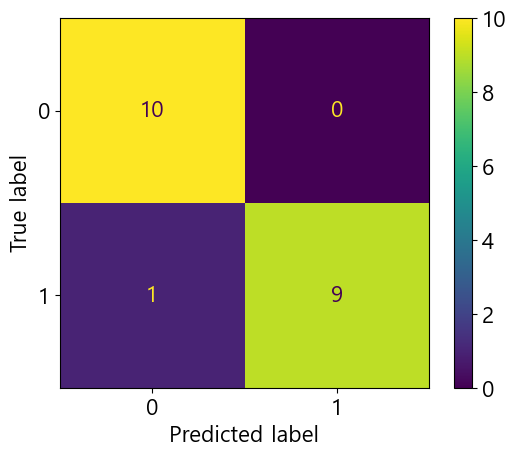

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, X_test, y_test)
#미국 의대생의 입학관련 데이터셋
# Acceptance: 0이면 불합격, 1이면 합격
# BCPM: Bio/Chem/Physics/Math 과목의 학점 평균
# GPA: 전체과목 학점 평균
# VR: MCAT Verbal reasoning 과목 점수
# PS: MCAT Physical sciences 과목 점수
# WS: MCAT Writing sample 과목 점수
# BS: MCAT Biological sciences 과목 점수
# MCAT: MCAT 촘점
# Apps: 의대 지원 횟수
data_med = sm.datasets.get_rdataset("MedGPA",
package="Stat2Data")
df_med = data_med.data
df_med.tail()

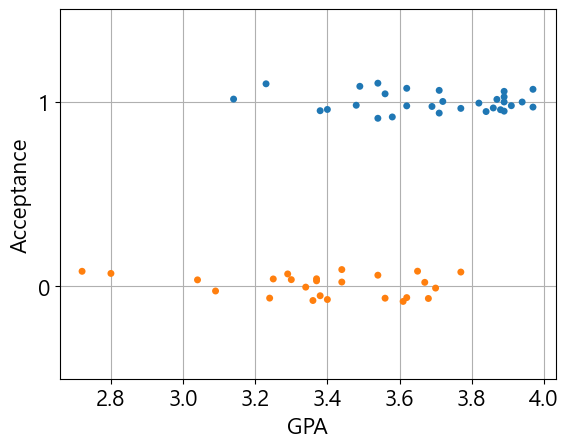

In [36]:
import seaborn as sns
# 학점과 합격여부의 상관관계
# jitter=True(데이터의 수가 많을 경우 겹치지 않도록 하는 옵션)
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [39]:
#MCAT = VR + PS + WS + BS이므로 MCAT는 독립변수에서 제외
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM +GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())
#1974년 '여성은 가정을 보살피고 국가를 운영하는 일은 남자에게맡겨두어야 한다'라는 주장에 대한 찬성,반대 입장을 조사한 자료
# education: 교육 기간
# sex: 성별
# agree: 찬성 인원
# disagree: 반대 인원
# ratio: 찬성 비율
data_wrole = sm.datasets.get_rdataset("womensrole",
package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree +
df_wrole.disagree)
df_wrole.tail()

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.5913
Time:                        12:14:41   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


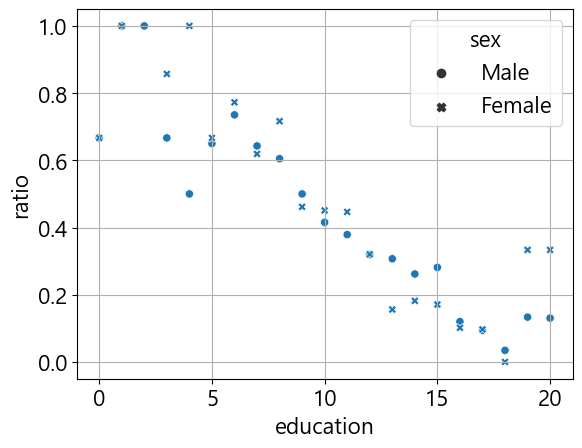

In [40]:
#교육수준이 높을수록 찬성 비율이 감소하고 있음(음의 상관관계)
sns.scatterplot(x="education", y="ratio", style="sex",
data=df_wrole)
plt.grid(True)
plt.show()

In [41]:
model_wrole = sm.Logit.from_formula("ratio ~ education + sex",df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())
#성별은 유의하지 않음

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.3435
Time:                        13:10:05   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [43]:
#성별을 제거한 모형
model_wrole2 = sm.Logit.from_formula("ratio ~ education",df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.3422
Time:                        13:10:31   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

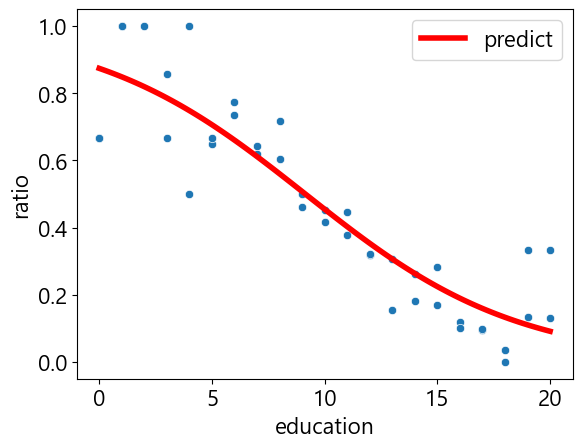

In [44]:
import pandas as pd
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4,
label="predict")
plt.legend()
plt.show()